# TECH CHALLENGE

## OBJETIVO

###### CARGO:
    - Ciêntista de dados
###### DESAFIO:
    - Desenvolver modelo de ML para prever obesidade


In [1]:
import base64
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,  chi2_contingency

In [2]:
pd.set_option('future.no_silent_downcasting', True)

- Base de dados disponibilizada pela FIAP

In [3]:
api_url = "https://api.github.com/repos/PedroSilva0z/Data-Viz-Production-Models/contents/Base/Obesity.csv"

r = requests.get(api_url)

# garante que vai estourar erro legível se falhar
r.raise_for_status()

# conteúdo vem em base64
content = r.json()['content']
csv_data = base64.b64decode(content).decode('utf-8')

# agora lemos normalmente
obesity = pd.read_csv(StringIO(csv_data))
obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Basic Informations

In [4]:
# Verificando tipagem

obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

# Descriptive information

In [5]:
# Verificando características de colunas numéricas

obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Empty Values

In [6]:
# Verificando nulos por coluna

obesity.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

# Duplicated values

In [7]:
# Verificando linhas duplicadas

print("Dup 1:", obesity.duplicated().sum())

# Removendo linhas duplicadas

obesity = obesity.drop_duplicates()

# Confirmando remoção das linhas duplicadas

print("Dup 2:", obesity.duplicated().sum())

Dup 1: 24
Dup 2: 0


- **Gender:** Gênero.
- **Age:** Idade.
- **Height:** Altura em metros.
- **Weight:** Peso em kgs.
- **family_history:** Algum membro da família sofreu ou sofre de excesso de peso?
- **FAVC:** Você come alimentos altamente calóricos com frequência?
- **FCVC:** Você costuma comer vegetais nas suas refeições?
- **NCP:** Quantas refeições principais você faz diariamente?
- **CAEC:** Você come alguma coisa entre as refeições?
- **SMOKE:** Você fuma?
- **CH2O:** Quanta água você bebe diariamente?
- **SCC:** Você monitora as calorias que ingere diariamente?
- **FAF:** Com que frequência você pratica atividade física?
- **TER:** Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?
- **CALC:** Com que frequência você bebe álcool?
- **MTRANS:** Qual meio de transporte você costuma usar?
- **Obesity_level (coluna alvo):** Nível de obesidade

# Data validation

In [8]:
## Arredondar colunas numéricas decimais para número inteiro, conforme indicado no dicionário disponibilizado

# 1 - selecionando colunas numéricas

col_Int_double = ['FCVC','NCP','CH2O','FAF','TUE']

obesity[col_Int_double] = obesity[col_Int_double].round().astype(int)

# 3 - verificando resultado

obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# Data transformation

In [9]:
# Usamos como boas práticas transformar variáveis "Sim" e "Não" em variáveis booleanas

obesity['Gender'] = obesity['Gender'].replace({'Female': 0, 'Male': 1}).astype('int64')
obesity['family_history'] = obesity['family_history'].replace({'no': 0, 'yes': 1}).astype('int64')
obesity['FAVC'] = obesity['FAVC'].replace({'no': 0, 'yes': 1}).astype('int64')
obesity['SMOKE'] = obesity['SMOKE'].replace({'no': 0, 'yes': 1}).astype('int64')
obesity['SCC'] = obesity['SCC'].replace({'no': 0, 'yes': 1}).astype('int64')

# Verificando resultado

obesity.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# Translate DataFrame


In [10]:
# Traduzindo cabeçalhos para português (BR)

obesity = obesity.rename(
    columns={
        'Gender': 'genero',
        'Age': 'idade',
        'Height': 'altura_m',
        'Weight': 'peso_kg',
        'family_history': 'hist_familiar_obesidade',
        'FAVC': 'freq_alimentos_caloricos',
        'FCVC': 'freq_vegetais',
        'NCP': 'num_refeicoes_dia',
        'CAEC': 'lanches_entre_refeicoes',
        'SMOKE': 'fumante',
        'CH2O': 'consumo_agua',
        'SCC': 'monitor_calorias',
        'FAF': 'freq_exercicios_semana',
        'TUE': 'tempo_tela_diario',
        'CALC': 'consumo_alcool',
        'MTRANS': 'meio_transporte',
        'Obesity': 'nivel_obesidade'
    }
)

# Verificando resultado

obesity.head()

,genero,idade,altura_m,peso_kg,hist_familiar_obesidade,freq_alimentos_caloricos,freq_vegetais,num_refeicoes_dia,lanches_entre_refeicoes,fumante,consumo_agua,monitor_calorias,freq_exercicios_semana,tempo_tela_diario,consumo_alcool,meio_transporte,nivel_obesidade
0,0,21.0,1.62,64.0,1,0,2,3,Sometimes,0,2,0,0,1,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II


# Rename results

In [11]:
obesity['lanches_entre_refeicoes'] = obesity['lanches_entre_refeicoes'].replace(
    {'Sometimes': 'pouco',
     'Frequently': 'frequente',
     'Always': 'sempre',
     'no': 'nunca'}
)
obesity['consumo_alcool'] = obesity['consumo_alcool'].replace(
    {'Sometimes': 'pouco',
     'Frequently': 'frequente',
     'Always': 'sempre',
     'no': 'nunca'}
)
obesity['meio_transporte'] = obesity['meio_transporte'].replace(
    {'Automobile': 'carro',
     'Motorbike': 'moto',
     'Bike': 'bicicleta', 
     'Public_Transportation': 'transporte público',
     'Walking': 'caminhando'}
)
obesity['nivel_obesidade'] = obesity['nivel_obesidade'].replace(
    {'Normal_Weight': 'peso normal',
     'Overweight_Level_I': 'sobrepeso nível 1',
     'Overweight_Level_II': 'sobrepeso nível 2',
     'Obesity_Type_I': 'obesidade tipo 1', 
     'Obesity_Type_II': 'obesidade tipo 2',
     'Obesity_Type_III': 'obesidade tipo 3',
     'Insufficient_Weight': 'abaixo do peso'}
)

obesity['IMC'] = obesity.peso_kg / (obesity.altura_m ** 2)

obesity.head()

,genero,idade,altura_m,peso_kg,hist_familiar_obesidade,freq_alimentos_caloricos,freq_vegetais,num_refeicoes_dia,lanches_entre_refeicoes,fumante,consumo_agua,monitor_calorias,freq_exercicios_semana,tempo_tela_diario,consumo_alcool,meio_transporte,nivel_obesidade,IMC
0,0,21.0,1.62,64.0,1,0,2,3,pouco,0,2,0,0,1,nunca,transporte público,peso normal,24.386526
1,0,21.0,1.52,56.0,1,0,3,3,pouco,1,3,1,3,0,pouco,transporte público,peso normal,24.238227
2,1,23.0,1.80,77.0,1,0,2,3,pouco,0,2,0,2,1,frequente,transporte público,peso normal,23.765432
3,1,27.0,1.80,87.0,0,0,3,3,pouco,0,2,0,2,0,frequente,caminhando,sobrepeso nível 1,26.851852
4,1,22.0,1.78,89.8,0,0,2,1,pouco,0,2,0,0,0,pouco,transporte público,sobrepeso nível 2,28.342381


<br>

# Resultado Esperado

<br>

- Pipeline de machine learning demonstrando toda a etapa de feature engineering e treinamento do modelo
- Modelo com assertividade acima de 75%
- Realizar o deploy do seu modelo em uma aplicação preditiva utilizando o Streamlit
- Construir uma visão analítica em um painel com principais insights obtidos com o estudo sobre obesidade para trazer insights para a equipe médica

<Axes: ylabel='Frequency'>

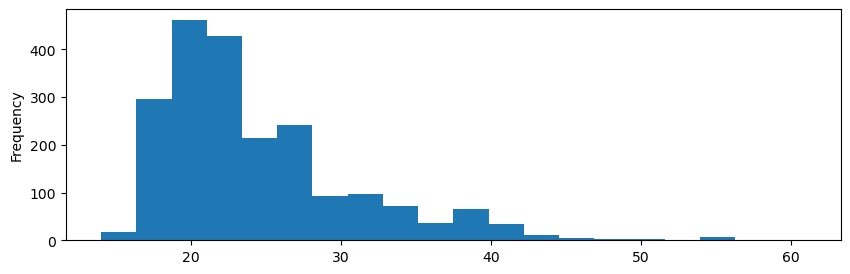

In [12]:
plt.figure(figsize=(10,3))

obesity['idade'].plot(kind='hist', bins=20)

- Pico grande entre 18 e 25 anos → jovens dominam o conjunto de dados.
- A queda progressiva até 40 anos indica amostra não balanceada por faixa etária.
- A presença de poucos pontos acima de 50–60 anos sugere que:
    - São exceções
    - Podem impactar análises que envolvam média (ex.: calorias, exercícios)

idade          Axes(0.125,0.11;0.227941x0.77)
peso_kg     Axes(0.398529,0.11;0.227941x0.77)
altura_m    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

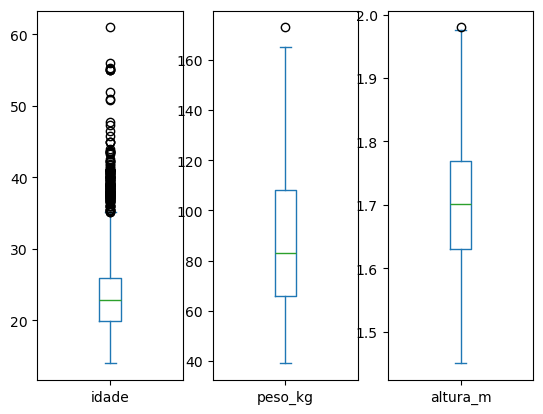

In [13]:
obesity[['idade','peso_kg','altura_m']].plot(kind='box', subplots=True)

##### Idade

- A distribuição é concentrada entre 18 e 30 anos → população majoritariamente jovem.
- Muitos outliers acima de 40–55 anos → minoria mais velha pode influenciar médias.
- Pode indicar que o estudo foi feito em ambiente universitário ou laboral de jovens.

##### Peso

- Peso mediano ~80 kg, com grande variação (40 kg até >150 kg).
- Outliers altos sugerem casos de obesidade severa.
- Pode existir relação entre baixo nível de exercícios ou mau hábito alimentar com os pesos mais altos.

##### Altura

- Altura concentrada entre 1.60 e 1.75 m.
- Poucos outliers acima de 1.90 m.
- A distribuição é relativamente simétrica → altura não parece ser um fator crítico nesta amostra.

In [14]:
print('\n\nFrequência dos dados de consumo de lanche: \n')
print(obesity['lanches_entre_refeicoes'].value_counts())

print('\n\nFrequência por nivel de obesidade: \n')
print(obesity['nivel_obesidade'].value_counts())

print('\n\nFrequeência por meio de transporte: \n')
print(obesity['meio_transporte'].value_counts())



Frequência dos dados de consumo de lanche: 

lanches_entre_refeicoes
pouco        1761
frequente     236
sempre         53
nunca          37
Name: count, dtype: int64


Frequência por nivel de obesidade: 

nivel_obesidade
obesidade tipo 1     351
obesidade tipo 3     324
obesidade tipo 2     297
sobrepeso nível 2    290
peso normal          282
sobrepeso nível 1    276
abaixo do peso       267
Name: count, dtype: int64


Frequeência por meio de transporte: 

meio_transporte
transporte público    1558
carro                  456
caminhando              55
moto                    11
bicicleta                7
Name: count, dtype: int64


##### Consumo de lanche:

- A maioria das pessoas consome lanches entre as refeições, mesmo que ocasionalmente (podendo aumentar a ingestão calórica diária).
- O grupo que **come lanches sempre (53)** pode apresentar **maior risco** de estar em níveis mais altos **de obesidade**.
- O número muito baixo de pessoas que não consome lanches (37) indica que o hábito de beliscar é comum na população estudada.
- Pode haver relação entre **“frequently/always” e obesidade tipo I, II e III**.

##### Nivel de Obesidade:

- O dataset tem uma alta **prevalência de obesidade**, especialmente **tipos I, II e III**.
- Apenas **~13% estão com baixo peso** > população tende mais a sobrepeso do que a magreza.
- A soma dos níveis elevados (I, II, III) indica quase 1/3 da amostra com obesidade significativa, sugerindo:

      - baixa atividade física
      - consumo calórico alto
      - possíveis hábitos sedentários


##### Transporte:

- Predomínio enorme do **transporte público (75%+)**, indicando que a maioria realiza pouca caminhada diária.
- Apenas **7 pessoas usam bicicleta** > indica baixa cultura de atividade física ligada a mobilidade.
    - Essa predominância pode estar **associada ao alto número de indivíduos com obesidade** e sobrepeso.
- A baixa **frequência de caminhada** como transporte (55 pessoas) sugere que:
    - o deslocamento diário não contribui significativamente para gasto calórico.

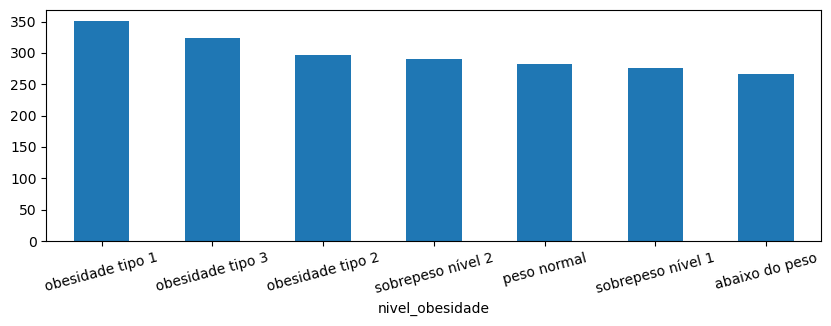

In [15]:
plt.figure(figsize=(10,3))

obesity['nivel_obesidade'].value_counts().plot(kind='bar')

plt.xticks(rotation=15)

plt.show()

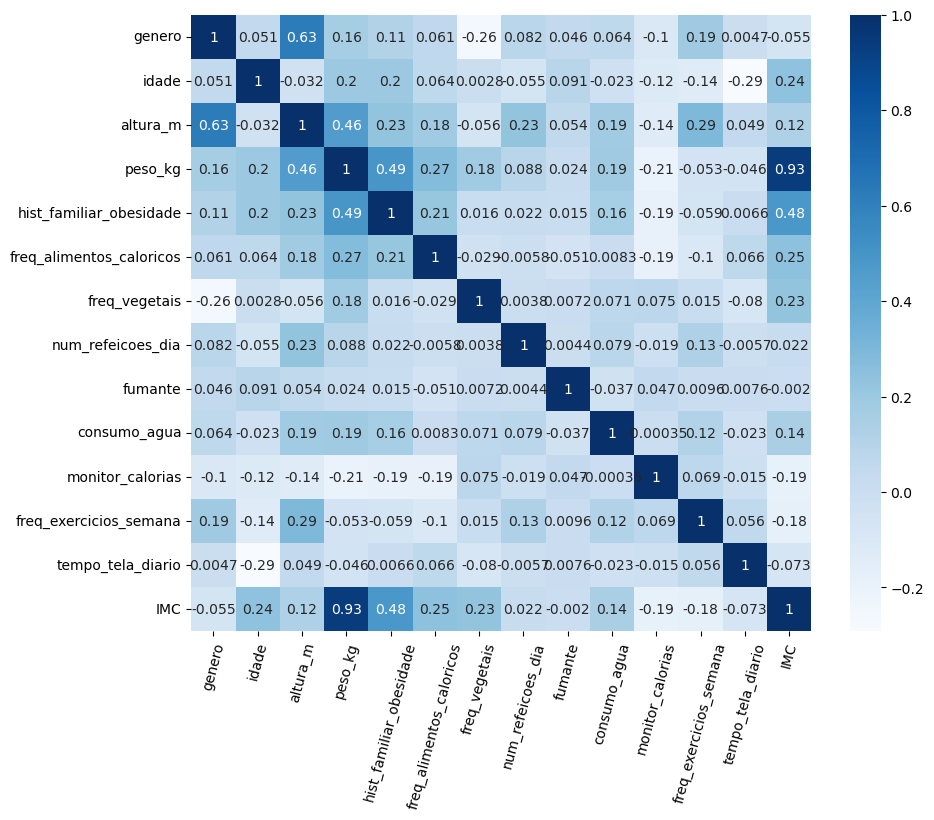

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(obesity.corr(numeric_only=True), annot=True, cmap='Blues')
plt.xticks(rotation=75)
plt.show()

### Correlação acima de 0.4

##### Altura × Gênero (0.63)

- Provavelmente a variável gênero está codificada como 0/1, onde um dos grupos é mais alto.
- Hipótese: homens tendem a ser mais altos que mulheres no dataset.

##### Altura × Peso (0.46)

- Pessoas mais altas tendem a pesar mais.
- Hipótese: composição corporal acompanha o aumento de altura.

#####  Peso × Histórico familiar de obesidade (0.49)

- Pessoas com histórico familiar de obesidade tendem a apresentar maior peso.
- Hipótese: existe forte componente genético/ambiental contribuindo para maior massa corporal.

#####  Idade × Peso (0.20)

- Pequeno aumento de peso conforme a idade cresce.
- Hipótese: indivíduos mais velhos ganham mais peso, possivelmente por menor gasto energético.


### Correlação Moderada

- Peso × Consumo diário de água (0.19)
- Pode indicar que pessoas com maior peso também consomem mais água — algo esperado fisiologicamente.

In [17]:
pd.crosstab(obesity['nivel_obesidade'], obesity['consumo_alcool'])

consumo_alcool,frequente,nunca,pouco,sempre
nivel_obesidade,,,,
abaixo do peso,1,117,149,0
obesidade tipo 1,14,165,172,0
obesidade tipo 2,2,71,224,0
obesidade tipo 3,0,1,323,0
peso normal,18,104,159,1
sobrepeso nível 1,16,50,210,0
sobrepeso nível 2,19,128,143,0


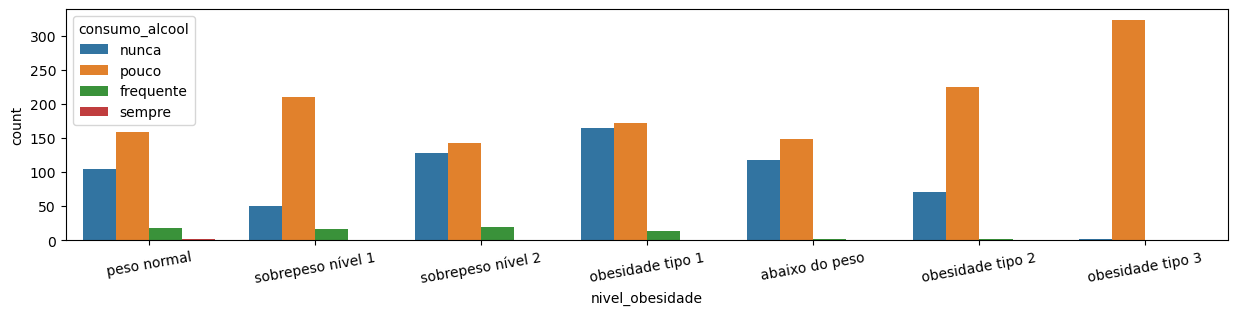

In [18]:
plt.figure(figsize=(15,3))
sns.countplot(data=obesity, x='nivel_obesidade', hue='consumo_alcool')
plt.xticks(rotation=10)
plt.show()

- Não Consumo e Consumo Ocasional Dominam: A grande maioria das observações em todos os níveis de peso reportou não consumir álcool ('no') ou consumir apenas ocasionalmente ('Sometimes').

- Baixa Frequência nos Extremos: O consumo 'Always' (sempre) é quase inexistente (apenas 2 casos). O consumo 'Frequently' (frequentemente) é baixo em geral e muito raro nos níveis de obesidade mais severos ('Obesity_Type_II' e 'III', com 2 e 0 casos, respectivamente).

- Maior Consumo Ocasional: O nível 'Obesity_Type_III' se destaca com o maior número de pessoas que consomem álcool 'Sometimes' (323), embora quase ninguém desse grupo beba frequentemente ou diga que "não bebe" (apenas 1 em 'no').

- Associação Fraca com Obesidade Severa: Não há evidência de uma associação crescente entre o aumento da severidade da obesidade e o consumo frequente de álcool.

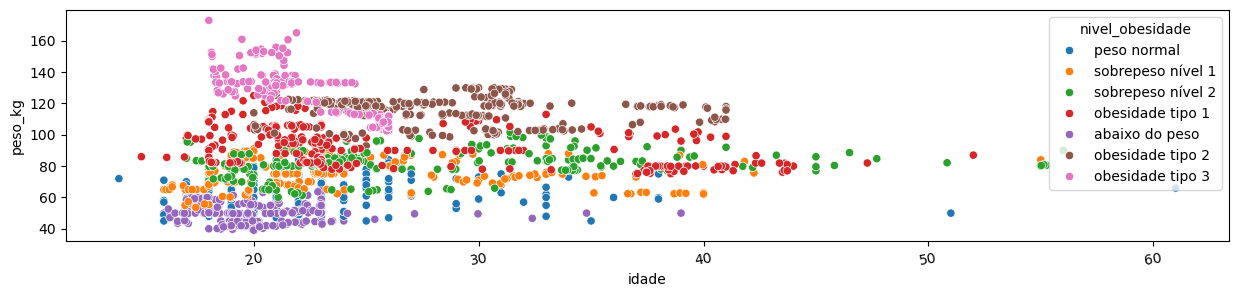

In [19]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=obesity, x='idade', y='peso_kg', hue='nivel_obesidade')
plt.xticks(rotation=10)
plt.show()

- Peso Define os Grupos: Os níveis de obesidade são claramente segregados pelo peso (eixo Y). 'Insufficient_Weight' e 'Normal_Weight' estão na base, e 'Obesity_Type_II' e 'III' estão no topo (acima de 100 kg).

- Amostra Jovem: A maioria dos participantes tem entre 20 e 35 anos.

- Idade Não é Fator Determinante: Não há uma correlação clara (tendência de aumento ou diminuição) entre idade e peso na amostra. Os pesos mais altos ('Obesity_Type_III') estão concentrados principalmente na faixa jovem (20-30 anos).

<br><br>

# Analysis of Variance

- Are the mean weights different across obesity levels?
  
<br><br>

In [20]:
# separating weight by obesity group
grupos = [
    group['peso_kg'].values
    for name, group in obesity.groupby('nivel_obesidade')
]

# ANOVA test
anova_res = f_oneway(*grupos)

In [21]:
print(f'FStatistic: {anova_res[0]} \npvalue: {anova_res[1]}')

FStatistic: 1926.51761064337 
pvalue: 0.0


**EN**

- The ANOVA:
    - F-statistic is extremely high (1926.52),
    - p-value is effectively zero
- indicating that average weight differs significantly across obesity levels.


**PT-BR**

- do ANOVA
    - estatística F é extremamente alta (1926,52)
    - p-valor é praticamente zero,
- indicando que o peso médio difere significativamente entre os níveis de obesidade.

<br><br>

# Chi-square independence

- Is there a relationship between two categorical variables?
    - Is alcohol consumption associated with obesity level?
    - Does the distribution of obesity levels change according to alcohol consumption frequency?

<br><br>

In [22]:
# tabela cruzada
tabela = pd.crosstab(obesity['nivel_obesidade'], obesity['consumo_alcool'])

# teste Qui-quadrado
chi2, p, df, expected = chi2_contingency(tabela)

In [23]:
print(f'CHI^2: {chi2} \nP Value: {p}')

CHI^2: 335.5649286015763 
P Value: 2.22093967310428e-60


**EN**

- The chi-square
    - statistic (335.56)
    - with an extremely small p-value
- shows a strong association between alcohol consumption and obesity category.

**PT-BR**

- qui-quadrado
    - A estatística (335,56)
    - Com um p-valor extremamente pequeno
- Mostra uma forte associação entre consumo de álcool e categoria de obesidade.

<br><br>

# IMPORT LIBS OF MACHINE LEARNING

Teste 1

<br><br>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree as sktree

## Feature Engineering

In [25]:
display(obesity.head(), obesity.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   genero                    2087 non-null   int64  
 1   idade                     2087 non-null   float64
 2   altura_m                  2087 non-null   float64
 3   peso_kg                   2087 non-null   float64
 4   hist_familiar_obesidade   2087 non-null   int64  
 5   freq_alimentos_caloricos  2087 non-null   int64  
 6   freq_vegetais             2087 non-null   int32  
 7   num_refeicoes_dia         2087 non-null   int32  
 8   lanches_entre_refeicoes   2087 non-null   object 
 9   fumante                   2087 non-null   int64  
 10  consumo_agua              2087 non-null   int32  
 11  monitor_calorias          2087 non-null   int64  
 12  freq_exercicios_semana    2087 non-null   int32  
 13  tempo_tela_diario         2087 non-null   int32  
 14  consumo_alcoo

,genero,idade,altura_m,peso_kg,hist_familiar_obesidade,freq_alimentos_caloricos,freq_vegetais,num_refeicoes_dia,lanches_entre_refeicoes,fumante,consumo_agua,monitor_calorias,freq_exercicios_semana,tempo_tela_diario,consumo_alcool,meio_transporte,nivel_obesidade,IMC
0,0,21.0,1.62,64.0,1,0,2,3,pouco,0,2,0,0,1,nunca,transporte público,peso normal,24.386526
1,0,21.0,1.52,56.0,1,0,3,3,pouco,1,3,1,3,0,pouco,transporte público,peso normal,24.238227
2,1,23.0,1.80,77.0,1,0,2,3,pouco,0,2,0,2,1,frequente,transporte público,peso normal,23.765432
3,1,27.0,1.80,87.0,0,0,3,3,pouco,0,2,0,2,0,frequente,caminhando,sobrepeso nível 1,26.851852
4,1,22.0,1.78,89.8,0,0,2,1,pouco,0,2,0,0,0,pouco,transporte público,sobrepeso nível 2,28.342381


None

In [26]:
# X = todas as variáveis exceto o target
X = obesity.drop(columns=['nivel_obesidade'])

# y = variável alvo
y = obesity['nivel_obesidade']

categoricas = X.select_dtypes(include=["object"]).columns
numericas = X.select_dtypes(include=["int64","float64"]).columns
    
preprocessador = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categoricas),
        ("num", "passthrough", numericas)
    ]
)

In [27]:
preprocessador

ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['lanches_entre_refeicoes', 'consumo_alcool', 'meio_transporte'], dtype='object')),
                                ('num', 'passthrough',
                                 Index(['genero', 'idade', 'altura_m', 'peso_kg', 'hist_familiar_obesidade',
       'freq_alimentos_caloricos', 'fumante', 'monitor_calorias', 'IMC'],
      dtype='object'))])

In [28]:
modelo = Pipeline(steps=[
    ("prep", preprocessador),
    ("tree", DecisionTreeClassifier(max_depth=6, random_state=42))
])


In [29]:
modelo

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['lanches_entre_refeicoes', 'consumo_alcool', 'meio_transporte'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['genero', 'idade', 'altura_m', 'peso_kg', 'hist_familiar_obesidade',
       'freq_alimentos_caloricos', 'fumante', 'monitor_calorias', 'IMC'],
      dtype='object'))])),
                ('tree', DecisionTreeClassifier(max_depth=6, random_state=42))])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

modelo.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['lanches_entre_refeicoes', 'consumo_alcool', 'meio_transporte'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['genero', 'idade', 'altura_m', 'peso_kg', 'hist_familiar_obesidade',
       'freq_alimentos_caloricos', 'fumante', 'monitor_calorias', 'IMC'],
      dtype='object'))])),
                ('tree', DecisionTreeClassifier(max_depth=6, random_state=42))])

In [31]:
# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia:", round(acc*100, 2), "%")

# Matriz de confusão
print("\nMatriz de confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Acurácia: 95.21 %

Matriz de confusão:
[[64  0  0  0  3  0  0]
 [ 0 84  4  0  0  0  0]
 [ 0  0 74  0  0  0  0]
 [ 0  0  0 81  0  0  0]
 [ 1  0  0  0 68  1  0]
 [ 0  0  0  0  5 55  9]
 [ 0  1  0  0  0  1 71]]

Classification Report:
                   precision    recall  f1-score   support

   abaixo do peso       0.98      0.96      0.97        67
 obesidade tipo 1       0.99      0.95      0.97        88
 obesidade tipo 2       0.95      1.00      0.97        74
 obesidade tipo 3       1.00      1.00      1.00        81
      peso normal       0.89      0.97      0.93        70
sobrepeso nível 1       0.96      0.80      0.87        69
sobrepeso nível 2       0.89      0.97      0.93        73

         accuracy                           0.95       522
        macro avg       0.95      0.95      0.95       522
     weighted avg       0.95      0.95      0.95       522



## hyperparameter tuning

O param_grid controla:

<br>✔ complexidade da árvore
<br>✔ tamanho mínimo dos splits
<br>✔ tamanho mínimo das folhas
<br>✔ qual função de impureza usar

In [32]:
param_grid = {
    "tree__max_depth": [3, 5, 7, 9, 12, None],         # Limits the depth of the tree.
    "tree__min_samples_split": [2, 5, 10, 20],         # Minimum number of samples to split a node.
    "tree__min_samples_leaf": [1, 2, 4, 6],            # Minimum number of samples in a leaf node.
    "tree__criterion": ["gini", "entropy", "log_loss"] # Function used to measure "impurity" in the tree.
}

grid = GridSearchCV(
    modelo, 
    param_grid, 
    cv=5, 
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

Melhores parâmetros: {'tree__criterion': 'gini', 'tree__max_depth': 3, 'tree__min_samples_leaf': 6, 'tree__min_samples_split': 2}
Melhor acurácia: 0.9757188498402556


C:\Users\Pedro\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Tree Interpretability

In [33]:
best_model = grid.best_estimator_
tree = best_model.named_steps["tree"]

feature_names = best_model.named_steps["prep"].get_feature_names_out()

importancias = pd.DataFrame({
    "feature": feature_names,
    "importance": tree.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importancias)

                                    feature  importance
18                                 num__IMC    0.824395
10                              num__genero    0.173693
13                             num__peso_kg    0.001912
17                    num__monitor_calorias    0.000000
16                             num__fumante    0.000000
15            num__freq_alimentos_caloricos    0.000000
14             num__hist_familiar_obesidade    0.000000
12                            num__altura_m    0.000000
11                               num__idade    0.000000
0        cat__lanches_entre_refeicoes_nunca    0.000000
1        cat__lanches_entre_refeicoes_pouco    0.000000
8                 cat__meio_transporte_moto    0.000000
7                cat__meio_transporte_carro    0.000000
6           cat__meio_transporte_caminhando    0.000000
5                cat__consumo_alcool_sempre    0.000000
4                 cat__consumo_alcool_pouco    0.000000
3                 cat__consumo_alcool_nunca    0

### Tree visualization

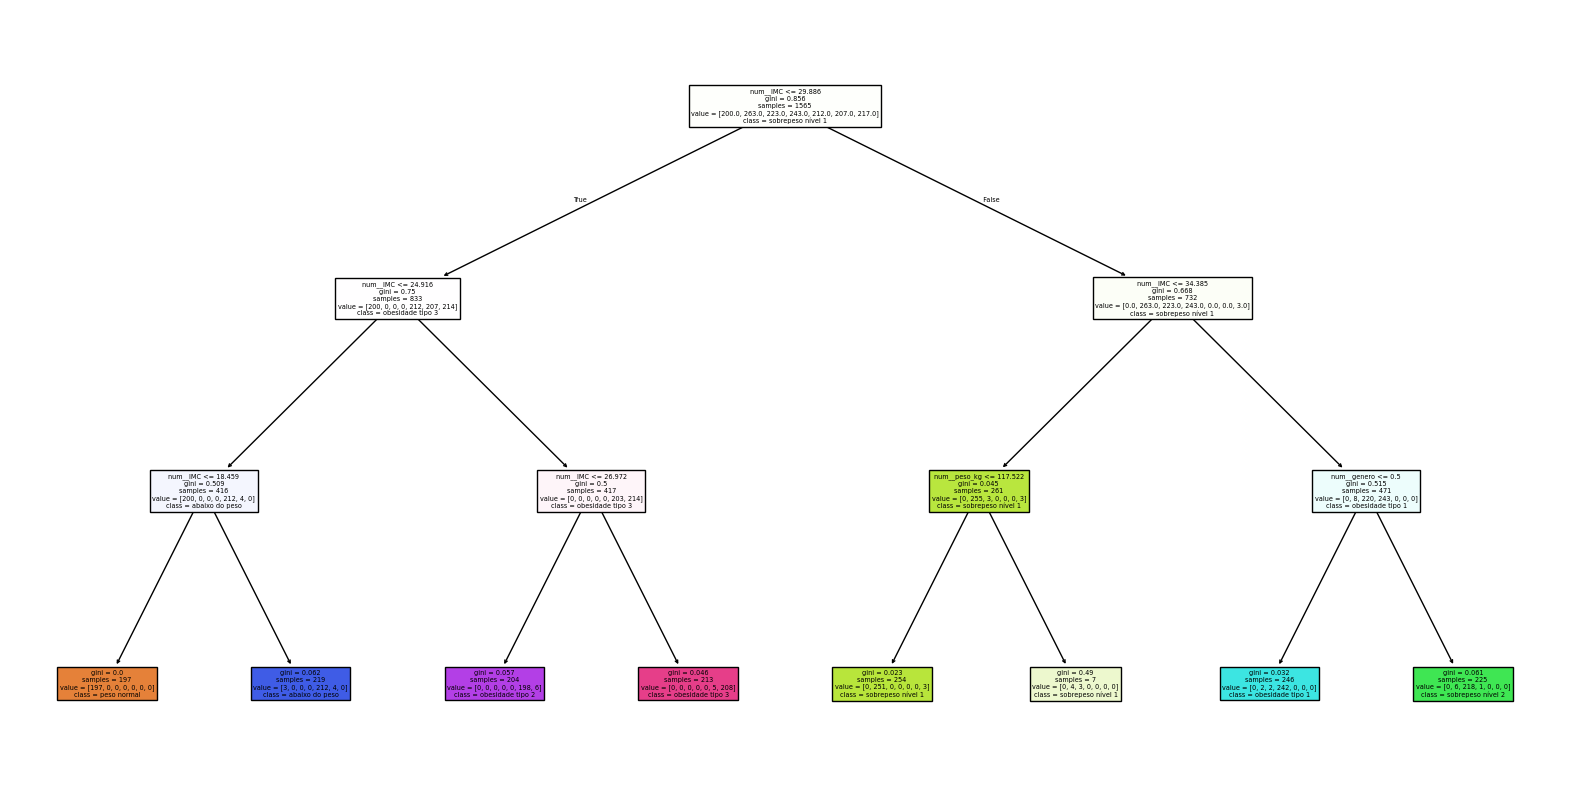

In [34]:
plt.figure(figsize=(20,10))
sktree.plot_tree(
    best_model.named_steps["tree"],
    feature_names=feature_names,
    class_names=y.unique(),
    filled=True
)
plt.savefig("arvore_matplotlib.png", dpi=300, bbox_inches="tight")
plt.show()